<a href="https://colab.research.google.com/github/Nabajyoti4/Phising_Url-Detection-Using-Tensorflow-Decision-forest/blob/main/Phising_URL_Detection_Decision_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow_decision_forests

     |████████████████████████████████| 6.2MB 2.6MB/s 
     |████████████████████████████████| 454.3MB 35kB/s 
     |████████████████████████████████| 6.0MB 42.7MB/s 
     |████████████████████████████████| 471kB 37.5MB/s 
     |████████████████████████████████| 1.2MB 35.2MB/s 
     |████████████████████████████████| 4.0MB 30.0MB/s 
     |████████████████████████████████| 4.0MB 35.8MB/s 
     |████████████████████████████████| 4.9MB 22.7MB/s 


In [2]:
!pip install -q wurlitzer

In [3]:
import tensorflow_decision_forests as tfdf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [4]:
# Some of the model training logs can cover the full
# screen if not compressed to a smaller viewport.
# This magic allows setting a max height for a cell.
@register_line_magic
def set_cell_height(size):
  display(
      Javascript("google.colab.output.setIframeHeight(0, true, {maxHeight: " +
                 str(size) + "})"))

In [5]:
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v0.1.4


In [10]:
dataset_df = pd.read_csv("/content/drive/MyDrive/Phising-Url-Classification/phising.csv")
dataset_df['Result'] = dataset_df['Result'].replace(-1,0)
# Display the first 3 examples.
dataset_df.head(3)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,0
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,0
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,0


In [11]:
# Name of the label column.
label = "Result"

classes = dataset_df[label].unique().tolist()
print(f"Label classes: {classes}")

dataset_df[label] = dataset_df[label].map(classes.index)

Label classes: [0, 1]


In [13]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.20):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples for testing.".format(
len(train_ds_pd), len(test_ds_pd)))

8799 examples in training, 2256 examples for testing.


In [14]:
# convert the pandas dataframe (pd.Dataframe) into tensorflow datasets (tf.data.Dataset)
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [15]:
%set_cell_height 300

# Specify the model.
model_1 = tfdf.keras.RandomForestModel()

# Optionally, add evaluation metrics.
model_1.compile(
    metrics=["accuracy"])

# Train the model.
# "sys_pipes" is optional. It enables the display of the training logs.
with sys_pipes():
  model_1.fit(x=train_ds)

<IPython.core.display.Javascript object>

2021-05-23 03:54:18.924432: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-05-23 03:54:18.933850: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2299995000 Hz


138/138 [==============================] - 5s 2ms/step


[INFO kernel.cc:746] Start Yggdrasil model training
[INFO kernel.cc:747] Collect training examples
[INFO kernel.cc:392] Number of batches: 138
[INFO kernel.cc:393] Number of examples: 8799
[INFO kernel.cc:769] Dataset:
Number of records: 8799
Number of columns: 32

Number of columns by type:
	NUMERICAL: 31 (96.875%)
	CATEGORICAL: 1 (3.125%)

Columns:

NUMERICAL: 31 (96.875%)
	0: "Abnormal_URL" NUMERICAL mean:0.70383 min:-1 max:1 sd:0.710368
	1: "DNSRecord" NUMERICAL mean:0.371747 min:-1 max:1 sd:0.928334
	2: "Domain_registeration_length" NUMERICAL mean:-0.342198 min:-1 max:1 sd:0.939628
	3: "Favicon" NUMERICAL mean:0.625185 min:-1 max:1 sd:0.780477
	4: "Google_Index" NUMERICAL mean:0.721105 min:-1 max:1 sd:0.692826
	5: "HTTPS_token" NUMERICAL mean:0.673372 min:-1 max:1 sd:0.739304
	6: "Iframe" NUMERICAL mean:0.816343 min:-1 max:1 sd:0.577568
	7: "Links_in_tags" NUMERICAL mean:-0.115809 min:-1 max:1 sd:0.763036
	8: "Links_pointing_to_page" NUMERICAL mean:0.341743 min:-1 max:1 sd:0.57025

##Evaluate the model

In [16]:
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

36/36 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9645

loss: 0.0000
accuracy: 0.9645


In [17]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [18]:
%set_cell_height 300
model_1.summary()

<IPython.core.display.Javascript object>

Model: "random_forest_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (31):
	Abnormal_URL
	DNSRecord
	Domain_registeration_length
	Favicon
	Google_Index
	HTTPS_token
	Iframe
	Links_in_tags
	Links_pointing_to_page
	Page_Rank
	Prefix_Suffix
	Redirect
	Request_URL
	RightClick
	SFH
	SSLfinal_State
	Shortining_Service
	Statistical_report
	Submitting_to_email
	URLURL_Length
	URL_of_Anchor
	age_of_domain
	double_slash_redirecting
	having_At_Symbol
	having_IPhaving_IP_Address
	having_Sub_Domain
	index
	on_mouseover
	popUpWidnow
	port
	web_traffic

No weights

Variable Importance: NUM_NODES:
    1.                       "index" 19196.000000 ################
    2.           "having_Sub_Domain" 5016.000000 #

In [19]:
model_1.make_inspector().features()

["Abnormal_URL" (1; #0),
 "DNSRecord" (1; #1),
 "Domain_registeration_length" (1; #2),
 "Favicon" (1; #3),
 "Google_Index" (1; #4),
 "HTTPS_token" (1; #5),
 "Iframe" (1; #6),
 "Links_in_tags" (1; #7),
 "Links_pointing_to_page" (1; #8),
 "Page_Rank" (1; #9),
 "Prefix_Suffix" (1; #10),
 "Redirect" (1; #11),
 "Request_URL" (1; #12),
 "RightClick" (1; #13),
 "SFH" (1; #14),
 "SSLfinal_State" (1; #15),
 "Shortining_Service" (1; #16),
 "Statistical_report" (1; #17),
 "Submitting_to_email" (1; #18),
 "URLURL_Length" (1; #19),
 "URL_of_Anchor" (1; #20),
 "age_of_domain" (1; #21),
 "double_slash_redirecting" (1; #22),
 "having_At_Symbol" (1; #23),
 "having_IPhaving_IP_Address" (1; #24),
 "having_Sub_Domain" (1; #25),
 "index" (1; #26),
 "on_mouseover" (1; #27),
 "popUpWidnow" (1; #28),
 "port" (1; #29),
 "web_traffic" (1; #30)]

In [20]:
# The feature importances
model_1.make_inspector().variable_importances()

{'NUM_AS_ROOT': [("URL_of_Anchor" (1; #20), 62.0),
  ("SSLfinal_State" (1; #15), 60.0),
  ("Prefix_Suffix" (1; #10), 52.0),
  ("web_traffic" (1; #30), 31.0),
  ("having_Sub_Domain" (1; #25), 20.0),
  ("Request_URL" (1; #12), 17.0),
  ("Links_in_tags" (1; #7), 17.0),
  ("Domain_registeration_length" (1; #2), 16.0),
  ("SFH" (1; #14), 8.0),
  ("age_of_domain" (1; #21), 4.0),
  ("DNSRecord" (1; #1), 4.0),
  ("Google_Index" (1; #4), 3.0),
  ("having_IPhaving_IP_Address" (1; #24), 3.0),
  ("Shortining_Service" (1; #16), 2.0),
  ("Links_pointing_to_page" (1; #8), 1.0)]}

In [21]:
# Evaluation
model_1.make_inspector().evaluation()

Evaluation(num_examples=8799, accuracy=0.9631776338220253, loss=0.10068835856930457, rmse=None, ndcg=None, aucs=None)

In [22]:
%set_cell_height 150
model_1.make_inspector().training_logs()

<IPython.core.display.Javascript object>

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=3211, accuracy=0.9314855185300529, loss=2.469512098342672, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=8742, accuracy=0.9487531457332419, loss=0.5884185508336744, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=8798, accuracy=0.9553307569902251, loss=0.2696756900735513, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=8799, accuracy=0.9581770655756336, loss=0.20595824388919032, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=8799, accuracy=0.9614728946471189, loss=0.16363496317526388, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=8799, accuracy=0.9612455960904648, loss=0.14460927820109837, rmse=None, ndcg=None, aucs=None)),
 TrainLog(num_trees=61, evaluation=Evaluation(num_examples=8799, accuracy=0

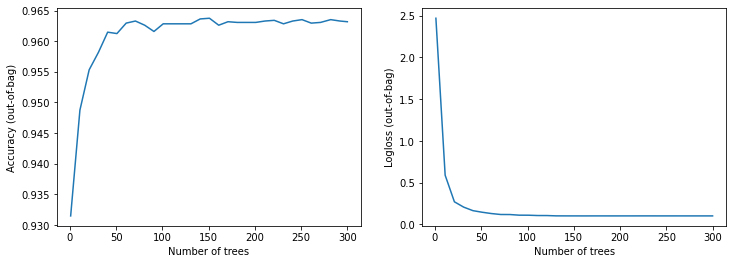

In [23]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()